In [1]:
import librosa
import matplotlib.pyplot as plt
import numpy as np

In [2]:
audio_file = "q5_audio.wav"
y, sr = librosa.load(audio_file)
print(f"sampling rate = {sr} and no of sample = {len(y)}")
print(f"duration = {len(y)/sr}")
print(f"frames in 20ms = {20*sr/1000}")

sampling rate = 22050 and no of sample = 259840
duration = 11.784126984126985
frames in 20ms = 441.0


- we therefore take 512 (closest 2 power to 441) sample in one frame
- we shift by 50 % therfore the shift length is 256 samples

In [3]:
window = 512
shift = 256

- here we take the hann window which is default for librosa
- we do not take rectangular window as it will have sudden transitons which will distort the original frequency content of the signal

In [4]:
energy = librosa.feature.rms(y=y, frame_length=window, hop_length=shift)[0]

zero_crossings = librosa.feature.zero_crossing_rate(y=y, frame_length=window, hop_length=shift)[0]

In [5]:
# Create time axis
frames = range(len(energy))
t = librosa.frames_to_time(frames, sr=sr, hop_length=shift)
print(t)

[0.00000000e+00 1.16099773e-02 2.32199546e-02 ... 1.17609070e+01
 1.17725170e+01 1.17841270e+01]


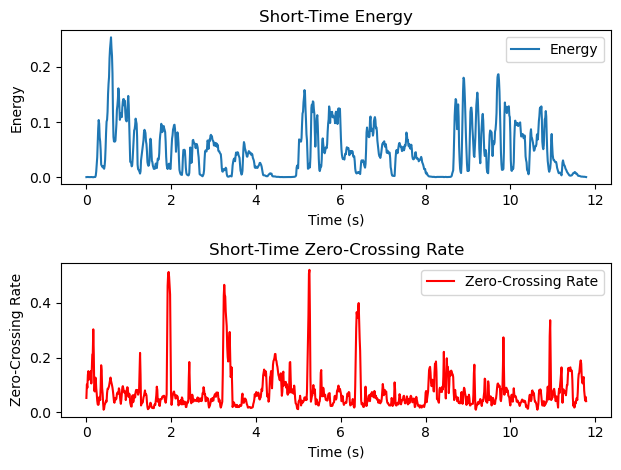

In [6]:
# Plot short-time energy
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(t, energy, label='Energy');
plt.xlabel('Time (s)')
plt.ylabel('Energy')
plt.title('Short-Time Energy')
plt.legend()

# Plot short-time zero-crossing rate
plt.subplot(2, 1, 2)
plt.plot(t, zero_crossings, label='Zero-Crossing Rate', color='r');
plt.xlabel('Time (s)')
plt.ylabel('Zero-Crossing Rate')
plt.title('Short-Time Zero-Crossing Rate')
plt.legend()

plt.tight_layout()